# **Logit**

##### Open-source Login Detector <br> <br>
**Owners** <br>
Umme Ammara <br>
Hassaan Ahmad Waqar


**Description** <br> 
Logit uses **Selenium Web Driver** to parse HTML DOM elements in order to find keywords that can be used to identify login fields. In particular, it uses the identifiers for **name** and **id** fields of a web page and compares them with pre-existing keyword lists that can be used to recognize a login field. It also searches for keywords associated to login fields. These include phrases like **Remember me** or **Forgot password**. The algorithm can be understood through the following flowchart: 

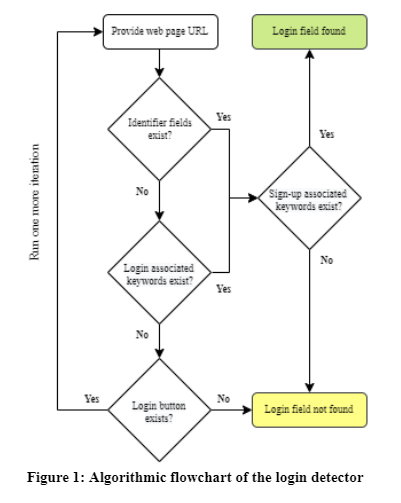

**Running Logit**

* Logit requires Selenium Web Driver to run. Download the web driver for your version of Chrome from [here](https://chromedriver.chromium.org/downloads) and store it in the same folder as of this file. 
* Logit requires 8 additional *.txt* files to function. These provide the keywords and URLs that need to be tested. Place them in the same folder as the other two files (chromedrive.exe and Logit.ipynb)

1.   **test.txt:** List of URLs to test
2.   **usernames_id.txt:** List of username id of benign web pages
3. **usernames_name.txt:** List of username name of benign web pages
4. **passwords_id.txt:** List of password id of benign web pages
5. **passwords_name.txt:** List of password names of benign web pages
6. **alternate.txt:** Alternate keywords associated to login pages
7. **login-button.txt:** Keywords to identify login buttons
8. **signup.txt:** Keywords associated to signup pages

All these lists are provided in the dataset sheets available [here](https://docs.google.com/spreadsheets/d/1w1-AZ8fcB_eAWon7rUXUSJBnRiMD_1_TNA5mfu5Cytk/edit?usp=sharing)

* Replace **PATH** variable in the code below to the path of your Chrome driver file.

Happy Detection 😀



In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import time
import re 

In [ ]:
class LoginBot:
    def __init__(self):
        PATH = 'D:/LUMS/7. FALL 2021-2022/CS 6712 - Internet Measurements/chromedriver.exe'
        self.bot = webdriver.Chrome(PATH)
        
    
    def getCreds(self):
        lines = []
        
        list_usernames_id = []
        list_usernames_name = []
        
        list_passwords_id = []
        list_passwords_name = []
        
        alternates = []
        login = []
        signup = []
        
        # All active URLs with login field true
        with open('test.txt') as file:
            lines = file.readlines()
            lines = [line.rstrip() for line in lines]
        file.close()
        
        # Based on Username ID
        with open('usernames_id.txt') as file:
            list_usernames_id = file.readlines()
            list_usernames_id= [line.rstrip() for line in list_usernames_id]
        file.close()
        
        # Based on Username Name
        with open('usernames_name.txt') as file:
            list_usernames_name = file.readlines()
            list_usernames_name = [line.rstrip() for line in list_usernames_name]
        file.close()
        
        # Based on Password names
        with open('passwords_id.txt') as file:
            list_passwords_id = file.readlines()
            list_passwords_id = [line.rstrip() for line in list_passwords_id]
        file.close()
        
        # Based on Password ID
        with open('passwords_name.txt') as file:
            list_passwords_name = file.readlines()
            list_passwords_name = [line.rstrip() for line in list_passwords_name]
        file.close()
        
        # Based on Aternate - Remember Me and Forgot Password merged list 
        with open('alternate.txt') as file:
            alternates = file.readlines()
            alternates = [line.rstrip() for line in alternates]
        file.close()
        
        # Based on Login buttons
        with open('login-button.txt') as file:
            login = file.readlines()
            login = [line.rstrip() for line in login]
        file.close()
        
        # Based on Signup buttons
        with open('signup.txt') as file:
            signup = file.readlines()
            signup = [line.rstrip() for line in signup]
        file.close()
        
        return lines, list_usernames_id, list_usernames_name, list_passwords_id, list_passwords_name, alternates, login, signup
    
    
    
    def find_login_only(self, url, users, passes, alternate, logins, signup):
        status = []
        bot = self.bot
        
        try:
            bot.get(url) 
            bool_sign3 = 0
            bool_sign1 = 0
            bool_sign2 = 0 
            alt_keyword = 0 
            # Check for name field of the Username
            for user in users:
                try:
                    bot.find_element_by_name(user)
                    username = 1 
                except:
                    pass  

            # Check for name field of the Password 
            for pw in passes:
                try:
                    bot.find_element_by_name(pw)
                    password = 1 
                except:
                    pass 
            
            if (username == 1 and password == 1) or password == 1: 
                status.append(1)
                print("Login Page Detected: ", url) 
                return 1 
              
            else:
                # Check using ID fields
                    
                # Check for ID field of the Username
                for user in users:
                    try:
                        bot.find_element_by_id(user)
                        username = 1 
                    except:
                        pass  

                # Check for ID field of the Password 
                for pw in passes:
                    try:
                        bot.find_element_by_id(pw)
                        password = 1 
                    except:
                        pass
                    
                else:
                    status.append(0)
                    print("Login Page NOT Detected: ", url)
                    return 1 

                    # Check for Alternate Keywords -> Remember me, Forgot Password
                    for alt in alternate:
                        if alt in src:
                            #Check for sign up identifier 
                            alt_keyword = 1 
                            status.append(0)
                            print("Login Page NOT Detected: ", url)
                            break 
                                
                    if alt_keyword == 0:
                        print("Login Page Detected: ", url)
        except:
            print("Page not working", url)
            status.append(-1)
            return -1 
            
    # Main Login Detector 
    def login(self, urls, users, passes, alternate, logins, signup):
        status = []        
        bot = self.bot
                
        for url in urls:
            username = 0 
            password = 0
            alt_keyword = 0 
            bool_sign1 = 0 
            bool_sign2 = 0 
            bool_sign3 = 0 
            try:
                bot.get(url) # see if it opens
                src = bot.page_source #to check text in web page 

                # Check for name field of the Username
                for user in users:
                    try:
                        bot.find_element_by_name(user)
                        username = 1 
                    except:
                        pass  

                # Check for name field of the Password 
                for pw in passes:
                    try:
                        bot.find_element_by_name(pw)
                        password = 1 
                    except:
                        pass 

                if (username == 1 and password == 1) or password == 1: 
                    #Check for sign up idenifiers 
                    for s in signup:
                        if s in src:
                            bool_sign3 = 1 
                            print("Signup Page Detected", url)
                            status.append(0)
                            print("Login Page NOT Detected: ", url)
                            break 
                                
                    if bool_sign3 == 0:
                        status.append(1)
                        print("Login Page Detected: ", url) #False Positive 
  
                else:
                    # Check using ID fields
                    
                    # Check for ID field of the Username
                    for user in users:
                        try:
                            bot.find_element_by_id(user)
                            username = 1 
                        except:
                            pass  

                    # Check for ID field of the Password 
                    for pw in passes:
                        try:
                            bot.find_element_by_id(pw)
                            password = 1 
                        except:
                            pass
                    
                    if (username == 1 and password == 1) or password==1: 
                        #Check for sign up idenifiers 
                        for s in signup:
                            if s in src:
                                bool_sign2 = 1 
                                print("Signup Page Detected", url)
                                status.append(0)
                                print("Login Page NOT Detected: ", url)
                                break 
                                
                        if bool_sign2 == 0:
                            status.append(1)
                            print("Login Page Detected: ", url) #False Positive 
                            
                    else:
                        # Check for Alternate Keywords -> Remember me, Forgot Password
                        for alt in alternate:
                            if alt in src:
                                #Check for sign up identifier 
                                alt_keyword = 1 
                                for s in signup:
                                    if s in src:
                                        bool_sign1 = 1 
                                        print("Signup Page Detected", url)
                                        status.append(0)
                                        print("Login Page NOT Detected: ", url)
                                        break 
                                break 
                                
                        if alt_keyword == 0:
                            #Check for login links
                            for l in logins:
                                try:
                                    bot.find_element_by_link_text(l).click()
                                    # Getting current URL
                                    get_url = bot.current_url
                                    s = self.find_login_only(get_url, users, passes, alternate, logins, signup)
                                    status.append(s)

                                except:
                                    status.append(0)
                                    print("Login Page NOT Detected: ", url)
                                     
            except:
                print("Page not working", url)
                status.append(-1)
        
        return status            

In [ ]:
# Initialize bot
bot  = LoginBot()
# Get data
urls, users_id, users_name, pass_id, pass_name, alternate, login, signup = bot.getCreds()
# Combining identifiers list
users_id.extend(users_name)
pass_id.extend(pass_name)

In [ ]:
# Removing duplicates
username_identifier = set(users_id)
password_identifier = set(pass_id)
alt = set(alternate)
log = set(login)
sig  = set(signup)

In [ ]:
# Running the bot
results = bot.login(urls, username_identifier, password_identifier, alt, log, sig)

In [ ]:
# Calculating Accuracy 
print("Total Train Benign URLS: ", len(results))
print("Detected: ", results.count(1))
print("Not Detected: ", results.count(0))
print("Page not Working", results.count(-1))
Accuracy = (results.count(1) / (len(results) - results.count(-1))) * 100 
print("Accuracy: ", Accuracy, "%")